# Summary Statistics and Tree of Life annotation

## example: fungi

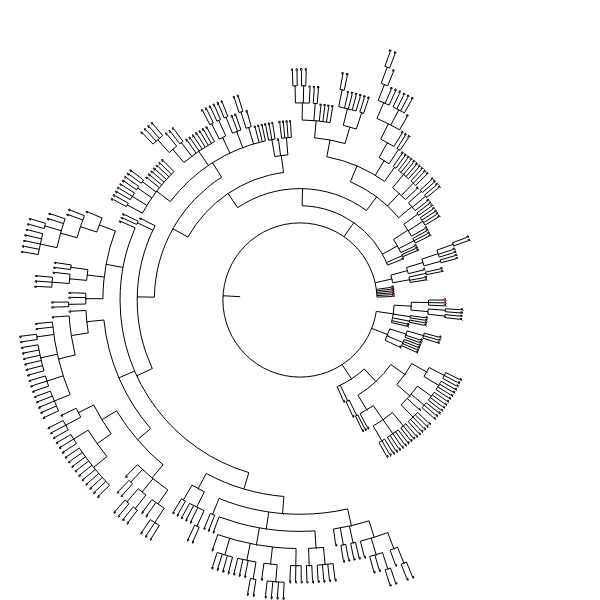

In [6]:
from IPython.display import Image, display
if __name__ == '__main__':
    display(Image(filename='piechart.png'))


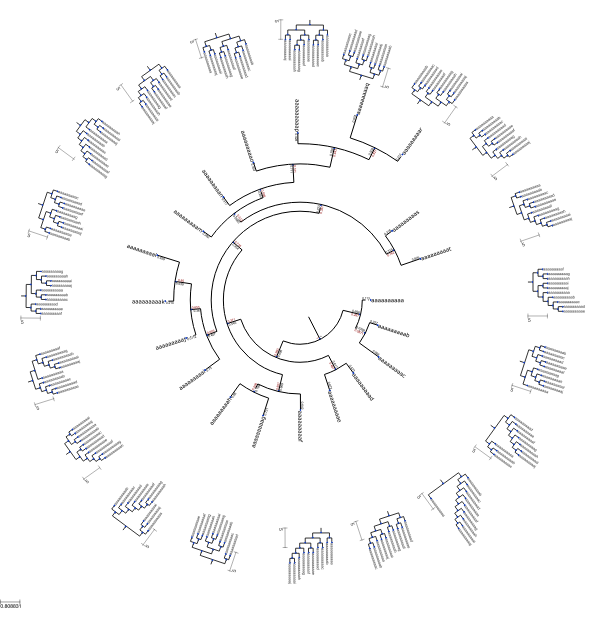

In [7]:
import random
from ete3 import Tree, TreeStyle, NodeStyle, faces, AttrFace, TreeFace
from IPython.display import Image, display

small_ts = TreeStyle()
small_ts.show_leaf_name = True
small_ts.scale = 10

def layout(node):
    if node.is_leaf():
        # Add node name to laef nodes
        N = AttrFace("name", fsize=14, fgcolor="black")
        faces.add_face_to_node(N, node, 0)

        t = Tree()
        t.populate(10)

        T = TreeFace(t, small_ts)
        # Let's make the sphere transparent
        T.opacity = 0.8
        # And place as a float face over the tree
        faces.add_face_to_node(T, node, 1, position="aligned")

def get_example_tree():
    # Random tree
    t = Tree()
    t.populate(20, random_branches=True)

    # Some random features in all nodes
    for n in t.traverse():
        n.add_features(weight=random.randint(0, 50))

    # Create an empty TreeStyle
    ts = TreeStyle()

    # Set our custom layout function
    ts.layout_fn = layout

    # Draw a tree
    ts.mode = "c"

    # We will add node names manually
    ts.show_leaf_name = False
    # Show branch data
    ts.show_branch_length = True
    ts.show_branch_support = True
    return t, ts

if __name__ == "__main__":
    t, ts = get_example_tree()
    t.render("tree_faces.png", w=600, dpi=300, tree_style=ts)
    display(Image('tree_faces.png'))

